In [6]:
import pandas as pd
data_secc_pcts = pd.read_csv('./../datos/info/data_secc_pct_vals.csv')


### Check pct values por fuerza

IZQUIERDA
0.02 0.06
MASSA
0.1 0.33
NO POSITIVOS
0.03 0.16
OTROS
0.03 0.28
PERON
0.24 0.63
PRO
0.19 0.49
PROVINCIAL
0.03 0.59
SOCIALISTA
0.05 0.35000000000000003
UCR
0.07 0.31


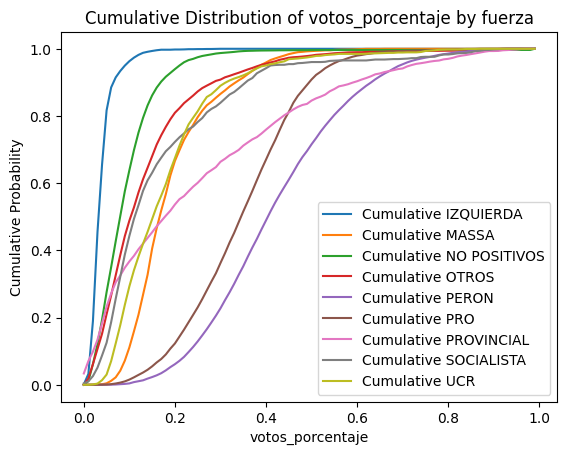

In [7]:
large = data_secc_pcts.loc[data_secc_pcts.votos_cantidad > data_secc_pcts.votos_cantidad.median()]
import matplotlib.pyplot as plt
import numpy as np

# Group by the column and count the occurrences
grouped_data = large.groupby('fuerza')


# Iterate over each group and plot the cumulative histogram
for name, group in grouped_data:
    hist, bins = np.histogram(group['votos_porcentaje'], bins=np.arange(0, 1.01, 0.01), density=True)
    cumulative = np.cumsum(hist)  # Compute the cumulative sum of the histogram counts
    cumulative /= cumulative[-1]  # Normalize the cumulative values to range from 0 to 1
    plt.plot(bins[:-1], cumulative, label=f'Cumulative {name}')

    # Filter the cumulative values in the middle range (between 0.2 and 0.8)
    mask = (cumulative >= 0.1) & (cumulative <= 0.9)
    filtered_bins = bins[:-1][mask]
    filtered_cumulative = cumulative[mask]

    # Print out the first and last occurrences of the filtered cumulative values
    print(name)
    print(filtered_bins[0], filtered_bins[-1])
    # print(cumulative[mask][0], cumulative[mask][-1])
    

# Add labels and title to the plot
plt.xlabel('votos_porcentaje')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of votos_porcentaje by fuerza')
plt.legend()

# Show the plot
plt.show()